<a href="https://colab.research.google.com/github/5dongdong/PY_AI/blob/master/NoShow_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/medical_noshow.csv')  
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No






*   PatientId : 환자 식별자 
*   AppointmentID : 예약 식별자 
*   Gender : 성별
*   ScheduledDay : 예약을 등록하거나 전화로 예약한 날짜
*   AppointmentDay : 실제 예약된 날짜
*   Age : 환자 나이
*   Neighbourhood : 예약한 병원 지역
*   Scholarship : 저소득 가정에게 제공하는 장학금 프로그램 가입 여부 
*   Hipertension : 고혈압 여부
*   Diabetes : 당뇨병 여부
*   Alcoholism : 알코올 중독 여부
*   Handcap : 장애 여부
*   SMS_received : 환자에게 보낸 메시지 수 
*   No-show : 진료 불이행 여부





















In [ ]:
df['Neighbourhood'].unique().tolist()

['JARDIM DA PENHA',
 'MATA DA PRAIA',
 'PONTAL DE CAMBURI',
 'REPÚBLICA',
 'GOIABEIRAS',
 'ANDORINHAS',
 'CONQUISTA',
 'NOVA PALESTINA',
 'DA PENHA',
 'TABUAZEIRO',
 'BENTO FERREIRA',
 'SÃO PEDRO',
 'SANTA MARTHA',
 'SÃO CRISTÓVÃO',
 'MARUÍPE',
 'GRANDE VITÓRIA',
 'SÃO BENEDITO',
 'ILHA DAS CAIEIRAS',
 'SANTO ANDRÉ',
 'SOLON BORGES',
 'BONFIM',
 'JARDIM CAMBURI',
 'MARIA ORTIZ',
 'JABOUR',
 'ANTÔNIO HONÓRIO',
 'RESISTÊNCIA',
 'ILHA DE SANTA MARIA',
 'JUCUTUQUARA',
 'MONTE BELO',
 'MÁRIO CYPRESTE',
 'SANTO ANTÔNIO',
 'BELA VISTA',
 'PRAIA DO SUÁ',
 'SANTA HELENA',
 'ITARARÉ',
 'INHANGUETÁ',
 'UNIVERSITÁRIO',
 'SÃO JOSÉ',
 'REDENÇÃO',
 'SANTA CLARA',
 'CENTRO',
 'PARQUE MOSCOSO',
 'DO MOSCOSO',
 'SANTOS DUMONT',
 'CARATOÍRA',
 'ARIOVALDO FAVALESSA',
 'ILHA DO FRADE',
 'GURIGICA',
 'JOANA D´ARC',
 'CONSOLAÇÃO',
 'PRAIA DO CANTO',
 'BOA VISTA',
 'MORADA DE CAMBURI',
 'SANTA LUÍZA',
 'SANTA LÚCIA',
 'BARRO VERMELHO',
 'ESTRELINHA',
 'FORTE SÃO JOÃO',
 'FONTE GRANDE',
 'ENSEADA DO SUÁ',
 'SA

In [ ]:
# 'Neighbourhood' 그룹별로 'No-show' 열의 값이 'Yes'와 'No'인 비율 계산
no_show_ratio = df.groupby('Neighbourhood')['No-show'].value_counts(normalize=True) * 100

# 결과 출력
print(no_show_ratio)

Neighbourhood    No-show
AEROPORTO        No         87.500000
                 Yes        12.500000
ANDORINHAS       No         76.967286
                 Yes        23.032714
ANTÔNIO HONÓRIO  No         81.549815
                              ...    
TABUAZEIRO       Yes        18.295019
UNIVERSITÁRIO    No         78.947368
                 Yes        21.052632
VILA RUBIM       No         83.431257
                 Yes        16.568743
Name: No-show, Length: 160, dtype: float64


In [ ]:
no_show_ratio

Neighbourhood    No-show
AEROPORTO        No         87.500000
                 Yes        12.500000
ANDORINHAS       No         76.967286
                 Yes        23.032714
ANTÔNIO HONÓRIO  No         81.549815
                              ...    
TABUAZEIRO       Yes        18.295019
UNIVERSITÁRIO    No         78.947368
                 Yes        21.052632
VILA RUBIM       No         83.431257
                 Yes        16.568743
Name: No-show, Length: 160, dtype: float64

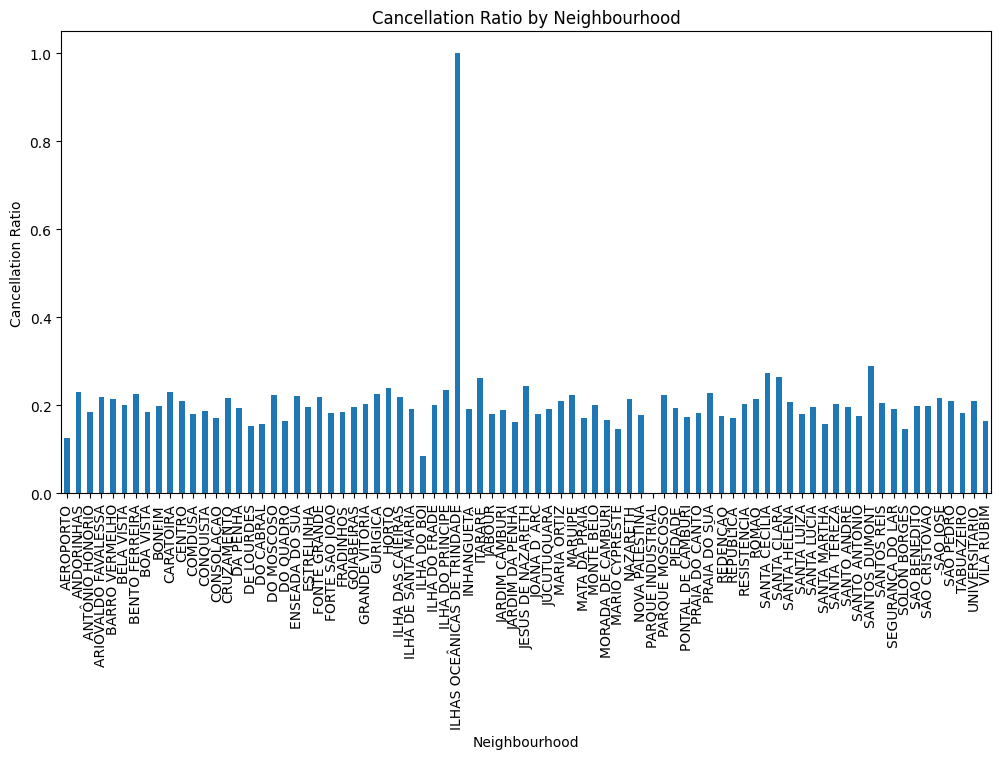

In [ ]:
# Neighbourhood 그룹별로 'No-show' 열에서 'Yes' 비율 계산하기
cancelled_ratio = df.groupby('Neighbourhood')['No-show'].value_counts(normalize=True).unstack()['Yes']

# 시각화하기
plt.figure(figsize=(12, 6))
cancelled_ratio.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [17]:
scholarship_counts = df.groupby('Neighbourhood')['Scholarship'].value_counts()
print(scholarship_counts)

Neighbourhood    Scholarship
AEROPORTO        0                 8
ANDORINHAS       0              1939
                 1               323
ANTÔNIO HONÓRIO  0               257
                 1                14
                                ... 
TABUAZEIRO       1               537
UNIVERSITÁRIO    0               147
                 1                 5
VILA RUBIM       0               776
                 1                75
Name: Scholarship, Length: 154, dtype: int64


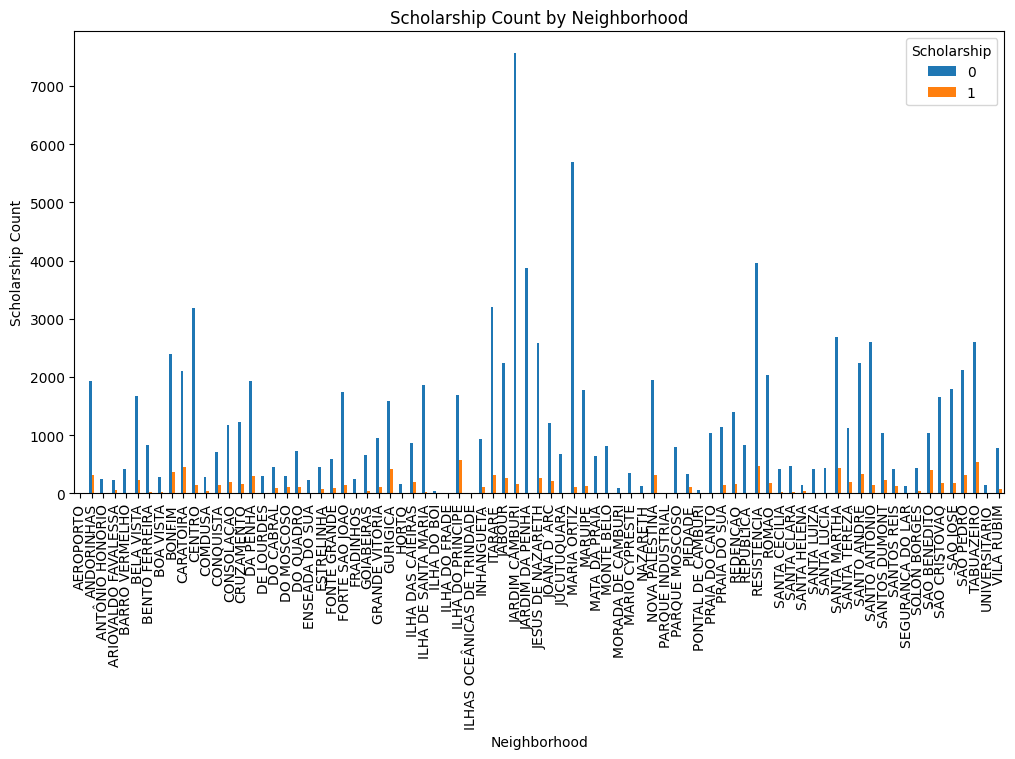

In [19]:
# Neighborhood 별 Scholarship 개수 계산
scholarship_counts = df.groupby('Neighbourhood')['Scholarship'].value_counts().unstack()

# 시각화
scholarship_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Neighborhood')
plt.ylabel('Scholarship Count')
plt.title('Scholarship Count by Neighborhood')
plt.xticks(rotation=90)
plt.legend(title='Scholarship')
plt.show()

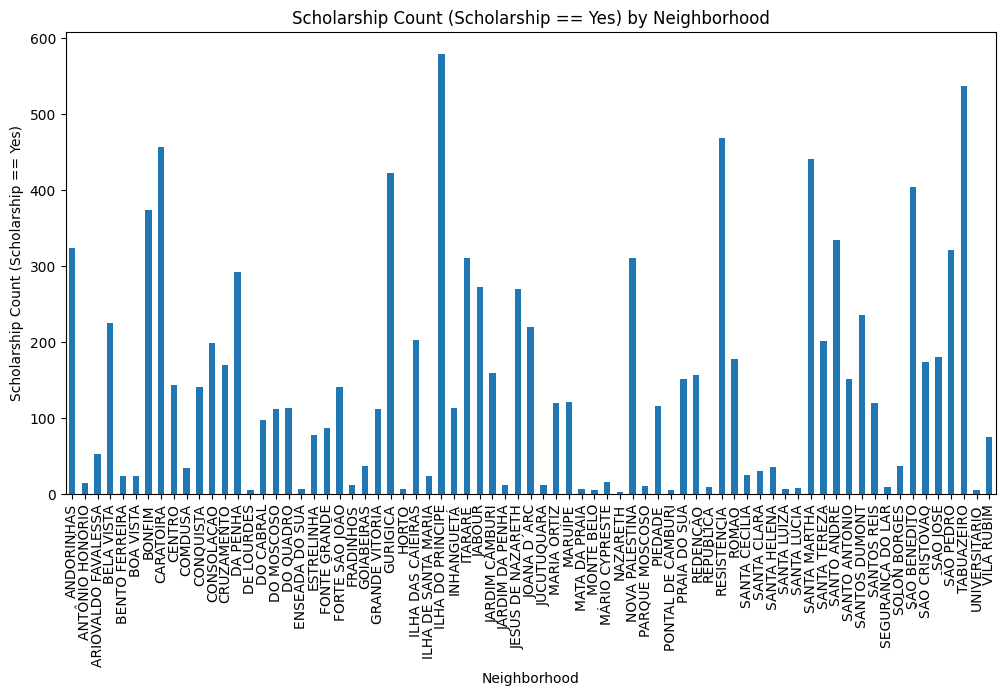

In [22]:
# 'Scholarship'이 'Yes'인 데이터 필터링
filtered_df = df[df['Scholarship'] == 1]

# Neighborhood 별 Scholarship 개수 계산
scholarship_counts = filtered_df.groupby('Neighbourhood')['Scholarship'].count()

# 시각화
plt.figure(figsize=(12, 6))
scholarship_counts.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Scholarship Count (Scholarship == Yes)')
plt.title('Scholarship Count (Scholarship == Yes) by Neighborhood')
plt.xticks(rotation=90)
plt.show()

In [23]:
# 'Neighbourhood' 그룹별 'Scholarship' 수 계산
scholarship_counts = filtered_df.groupby('Neighbourhood')['Scholarship'].count().reset_index()

In [28]:
# 'Scholarship'이 0인 데이터 필터링
filtered_counts = scholarship_counts[scholarship_counts['Scholarship'] == 0]
filtered_counts

,Neighbourhood,Scholarship


In [15]:
# Neighbourhood 그룹별로 'No-show' 열에서 'Yes' 비율 계산하기
cancelled_ratio = df.groupby('Neighbourhood')['Scholarship'].value_counts(normalize=True).unstack()['Yes']

# 시각화하기
plt.figure(figsize=(12, 6))
cancelled_ratio.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

KeyError: ignored

In [ ]:
df.info() #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 2. 데이터 전처리 



*   불필요한 'AppointmentID' 제거 
*   'No-show'열 데이터 수정 ( 1- 병원 예약 취소 )





In [ ]:
print(df['PatientId'].nunique())  # 'PatientId' 열에서 고유한 값들의 개수
print(df['AppointmentID'].nunique())  # 'AppointmentID' 열에서 고유한 값들의 개수

62299
110527


In [ ]:
df.drop('AppointmentID', axis=1, inplace=True) # AppointmentID 열 제거 
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
# ScheduledDay,AppointmentDay datetime 형식 변환
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hipertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handcap         110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  No-show         110527 non-null  object             
dtypes: datetime64[

In [ ]:
df['AppointmentMonth'] = df['AppointmentDay'].dt.month
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentMonth
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,6
110523,3.596266e+12,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,6
110524,1.557663e+13,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,6
110525,9.213493e+13,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,6


In [ ]:
# AppointmentDay - ScheduledDay 값을 계산하여 새로운 열 생성
df['DateDifference'] = (pd.to_datetime(df['AppointmentDay']).dt.date - pd.to_datetime(df['ScheduledDay']).dt.date).dt.days

# 결과 확인
print(df[['ScheduledDay', 'AppointmentDay', 'DateDifference']].head())

               ScheduledDay            AppointmentDay  DateDifference
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00               0
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00               0
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00               0
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00               0
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00               0


In [ ]:
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentMonth,DateDifference
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,0
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,0
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,0
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,6,35
110523,3.596266e+12,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,6,35
110524,1.557663e+13,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,6,41
110525,9.213493e+13,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,6,41


In [ ]:
df['Neighbourhood'].nunique()

81

# **3. EDA**

In [ ]:
# 'No-show'비율 확인
no_show_counts = df['No-show'].value_counts()
no_show_counts

No     88208
Yes    22319
Name: No-show, dtype: int64

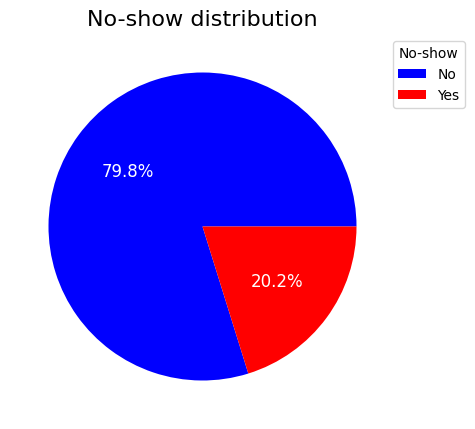

In [ ]:
# 파이 차트 
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(no_show_counts, 
                                   labels = no_show_counts.index, 
                                   autopct=lambda p: '{:.1f}%'.format(p), 
                                   colors=['blue', 'red'], 
                                   textprops={'color':'white', 'fontsize': 12})

# 범례 추가
plt.legend(wedges, no_show_counts.index,
           title="No-show",
           #loc="center left",
           bbox_to_anchor=(1, 0, 0.2, 1))

plt.setp(autotexts, size=12, color='white')  # 파이 차트 안의 텍스트 크기와 색상 설정
plt.title('No-show distribution', fontsize=16)  # 그래프 제목
plt.show()

In [ ]:
sms_counts = df['SMS_received'].value_counts()
sms_counts

0    75045
1    35482
Name: SMS_received, dtype: int64

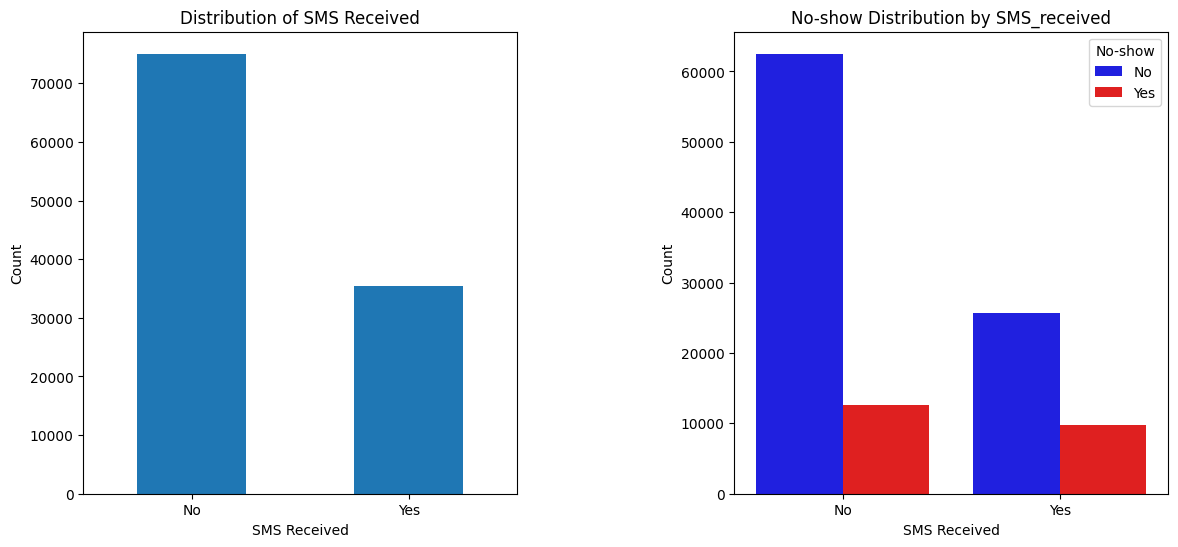

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# SMS 전송 여부 그래프
sms_counts.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('SMS Received')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of SMS Received')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# SMS 전송 여부에 따른 병원 예약 취소 비율 그래프
sns.countplot(x='SMS_received', hue='No-show', data=df, ax=axes[1], palette=['blue', 'red'])
axes[1].set_title('No-show Distribution by SMS_received')
axes[1].set_xlabel('SMS Received')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.subplots_adjust(wspace=0.5)  # 두 그래프 사이의 공간 조절
plt.show()

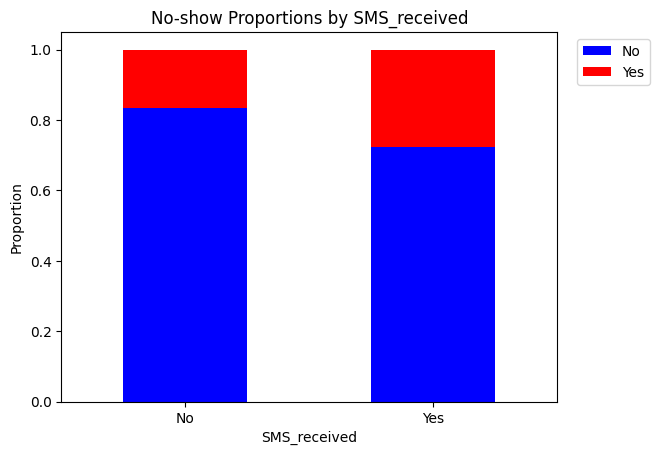

In [ ]:
# 데이터 정규화
df_grouped = df.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()

# 스택형 막대 그래프 생성
df_grouped.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.ylabel('Proportion')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.title('No-show Proportions by SMS_received')

# 범례 위치 변경
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
# 월별 분포 계산
month_counts = df['AppointmentMonth'].value_counts().sort_index()
month_counts


4     3235
5    80841
6    26451
Name: AppointmentMonth, dtype: int64

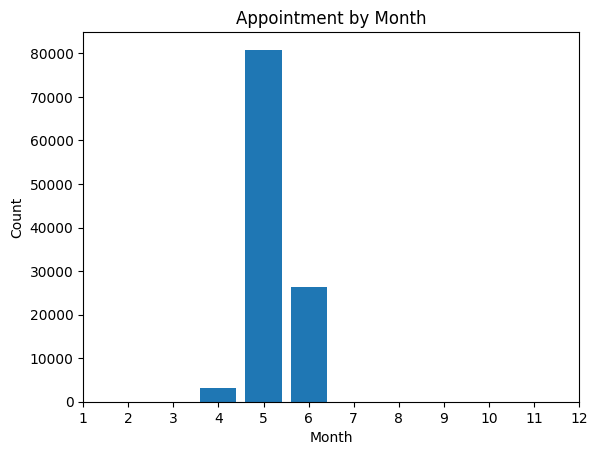

In [ ]:
# 시각화
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Appointment by Month')

# x축 눈금 설정 (1부터 12까지)
plt.xticks(range(1, 13))

# 그래프 출력
plt.show()

In [ ]:
# 4월, 5월, 6월 별로 예약 취소 여부 비율 계산
cancelled_ratio_4 = df[df['AppointmentMonth'] == 4]['No-show'].value_counts(normalize=True) * 100
cancelled_ratio_5 = df[df['AppointmentMonth'] == 5]['No-show'].value_counts(normalize=True) * 100
cancelled_ratio_6 = df[df['AppointmentMonth'] == 6]['No-show'].value_counts(normalize=True) * 100


months = ['April', 'May', 'June']
cancelled_ratios = [cancelled_ratio_4, cancelled_ratio_5, cancelled_ratio_6]


In [ ]:
cancelled_ratios

[No     80.432767
 Yes    19.567233
 Name: No-show, dtype: float64,
 No     79.213518
 Yes    20.786482
 Name: No-show, dtype: float64,
 No     81.543231
 Yes    18.456769
 Name: No-show, dtype: float64]

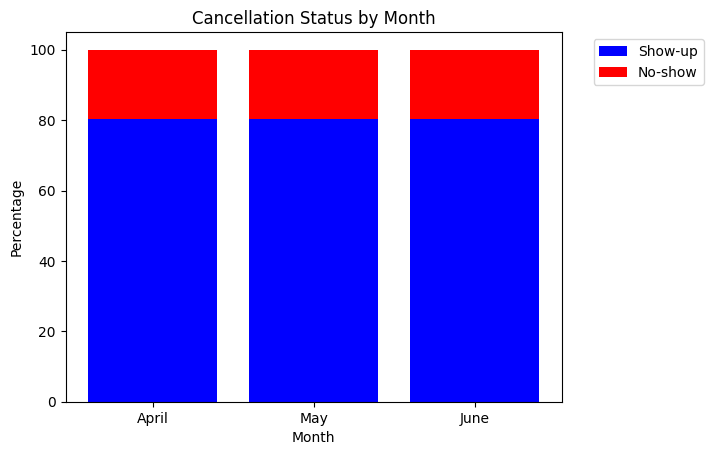

In [ ]:
total_ratio = cancelled_ratios[0]['Yes'] + cancelled_ratios[0]['No']

plt.bar(months, cancelled_ratios[0]['No'], label='Show-up', color='blue')
plt.bar(months, cancelled_ratios[0]['Yes'], bottom=cancelled_ratios[0]['No'], label='No-show', color='red')

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Cancellation Status by Month')
plt.legend()

# 범례 위치 변경
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

# 그래프 출력
plt.show()

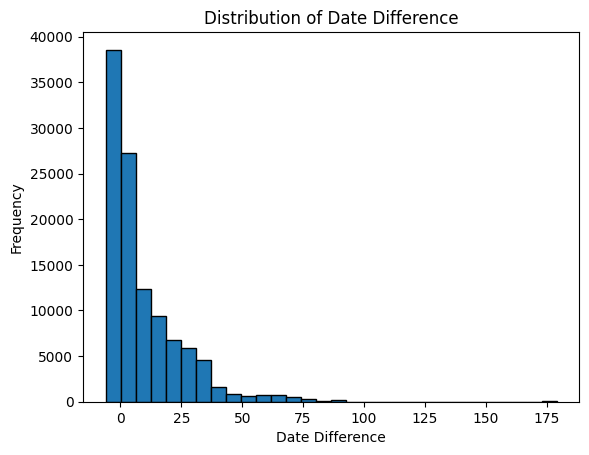

In [ ]:
plt.hist(df['DateDifference'], bins=30, edgecolor='black')
plt.xlabel('Date Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Date Difference')
plt.show()

In [ ]:
df['DateDifference'].value_counts().sort_index()

-6          1
-1          4
 0      38563
 1       5213
 2       6725
        ...  
 155       10
 162       11
 169        8
 176       16
 179       10
Name: DateDifference, Length: 131, dtype: int64

In [ ]:
df[df['DateDifference']< 0] #이상치

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentMonth,DateDifference
27033,7.839273e+12,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,5,-1
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,5,-1
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,5,-1
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,5,-6
72362,3.787482e+12,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,5,-1


In [ ]:
df = df[df['DateDifference'] >= 0] #이상치 제거 

In [ ]:
df.shape # 5개 행 제거 확인

(110522, 15)

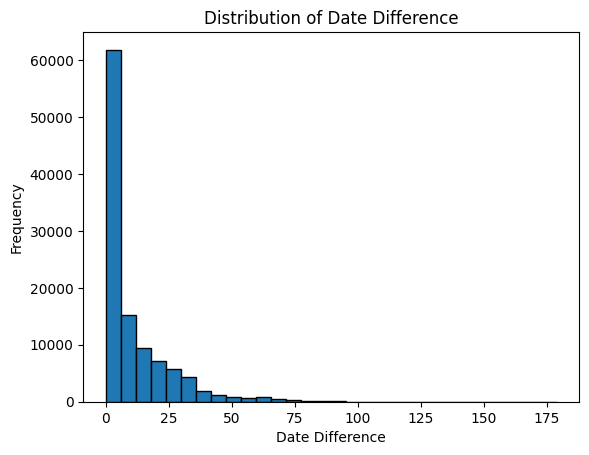

In [ ]:
plt.hist(df['DateDifference'], bins=30, edgecolor='black')
plt.xlabel('Date Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Date Difference')
plt.show()

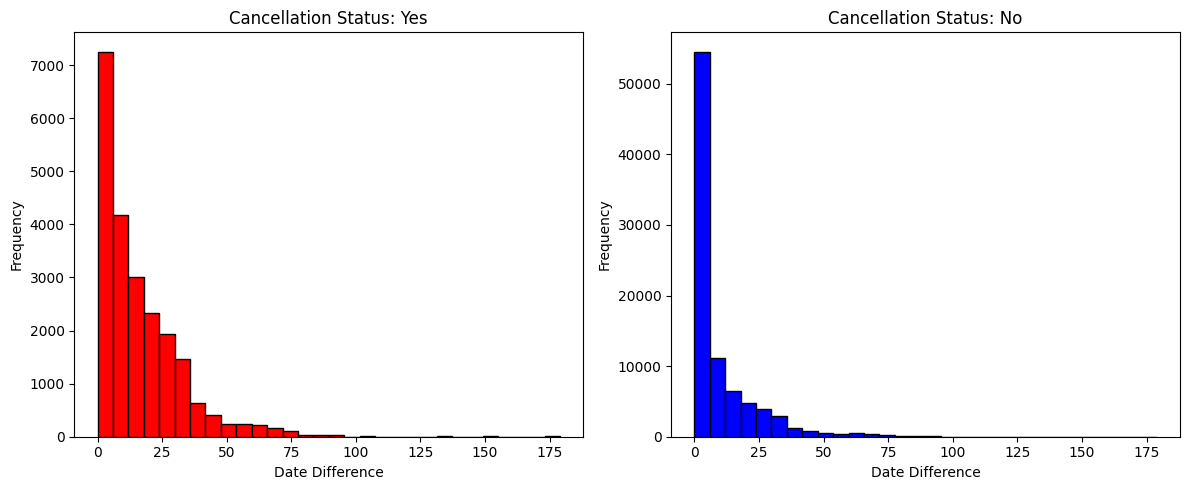

In [ ]:
# 병원 예약을 취소한 사람과 취소하지 않은 사람의 'DateDifference' 값
cancelled = df[df['No-show'] == 'Yes']['DateDifference']
not_cancelled = df[df['No-show'] == 'No']['DateDifference']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 병원 예약을 취소한 사람의 'DateDifference' 히스토그램
axes[0].hist(cancelled, bins=30, edgecolor='black', color='red')
axes[0].set_xlabel('Date Difference')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Cancellation Status: Yes')

# 병원 예약을 취소하지 않은 사람의 'DateDifference' 히스토그램
axes[1].hist(not_cancelled, bins=30, edgecolor='black', color='blue')
axes[1].set_xlabel('Date Difference')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Cancellation Status: No')

# 그래프 간 간격 조정
plt.tight_layout()

plt.show()

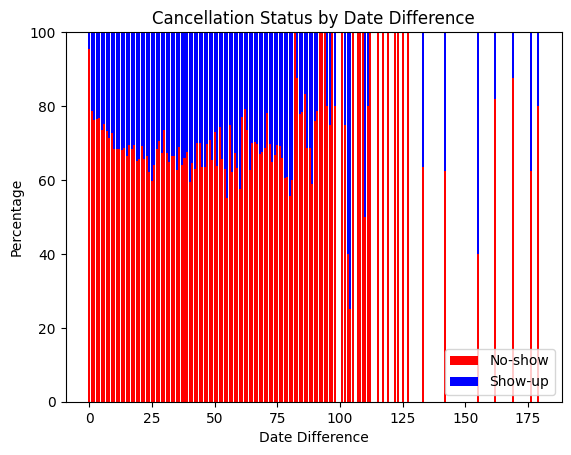

In [ ]:
# 'DateDifference' 열을 기준으로 병원 예약 취소한 사람과 취소하지 않은 사람의 비율 계산
cancelled_ratio = df.groupby('DateDifference')['No-show'].value_counts(normalize=True).unstack() * 100

# 시각화
plt.bar(cancelled_ratio.index, cancelled_ratio['No'], label='No-show', color='red')
plt.bar(cancelled_ratio.index, cancelled_ratio['Yes'], bottom=cancelled_ratio['No'], label='Show-up', color='blue')

plt.xlabel('Date Difference')
plt.ylabel('Percentage')
plt.title('Cancellation Status by Date Difference')
plt.legend()

plt.show()

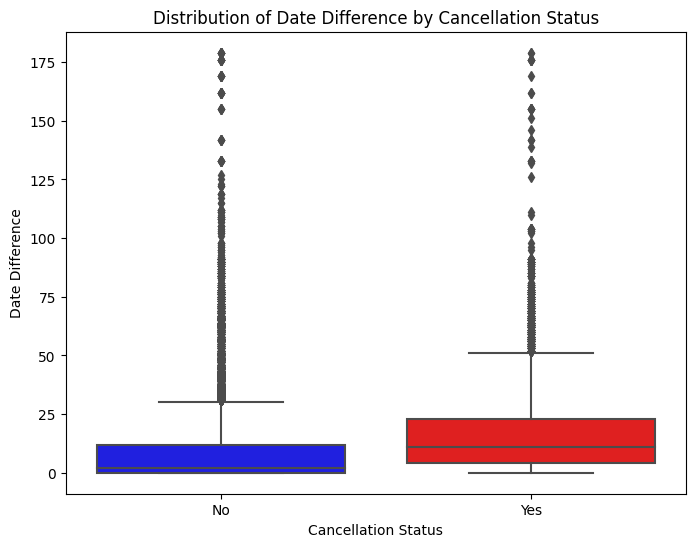

In [ ]:
# 예약 취소 여부에 따른 'DateDifference' 값 분포를 박스 플롯으로 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='No-show', y='DateDifference', data=df, palette={'No': 'blue', 'Yes': 'red'})
plt.xlabel('Cancellation Status')
plt.ylabel('Date Difference')
plt.title('Distribution of Date Difference by Cancellation Status')
plt.show()

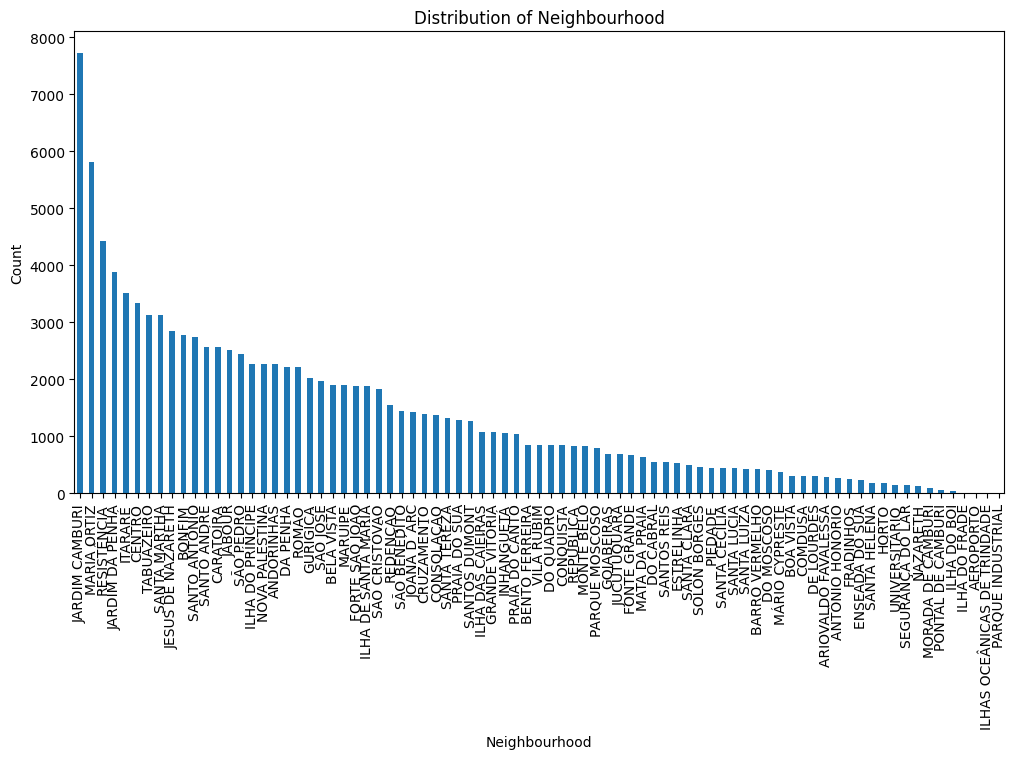

In [ ]:
plt.figure(figsize=(12, 6))
df['Neighbourhood'].value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood')
plt.xticks(rotation=90)
plt.show()

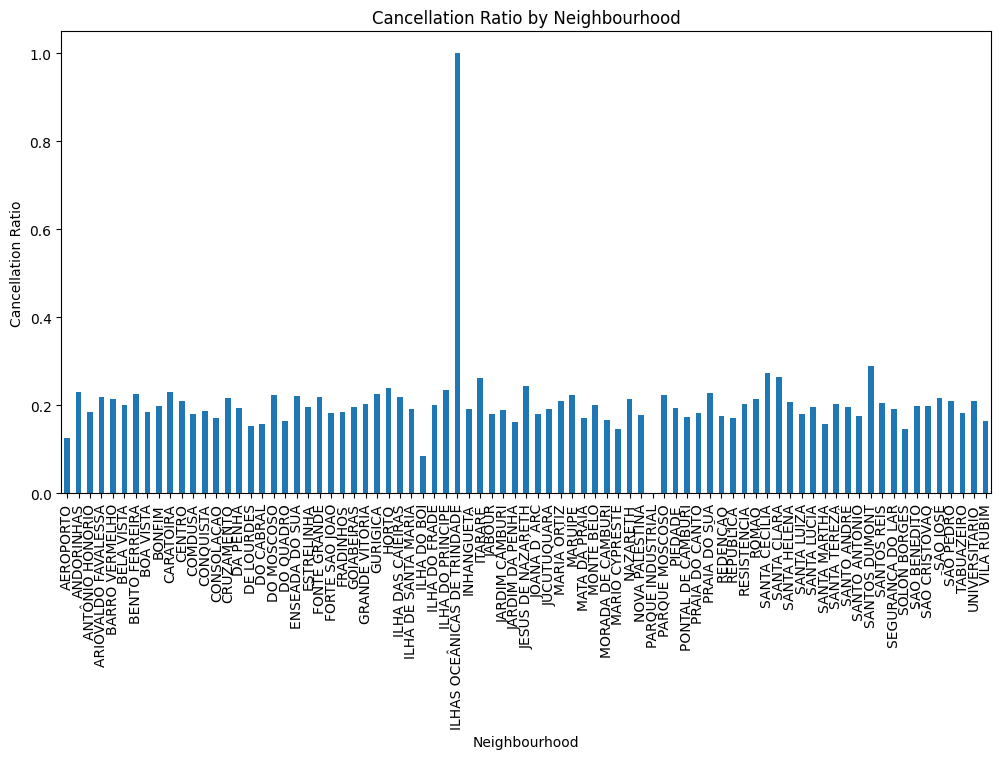

In [ ]:
# Neighbourhood 그룹별로 'No-show' 열에서 'Yes' 비율 계산하기
cancelled_ratio = df.groupby('Neighbourhood')['No-show'].value_counts(normalize=True).unstack()['Yes']

# 시각화하기
plt.figure(figsize=(12, 6))
cancelled_ratio.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

--------------------------------------------------------------------------------

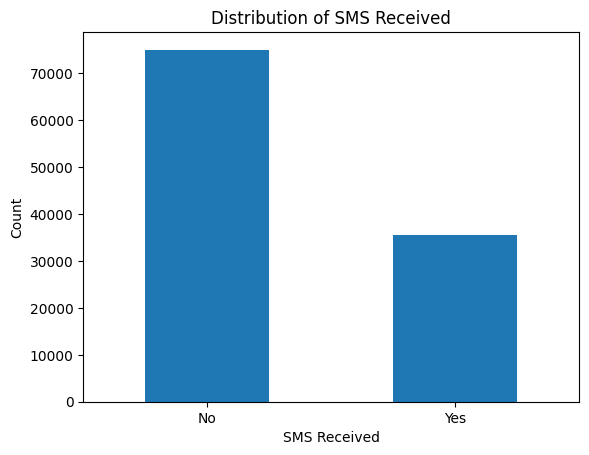

In [ ]:
# sms 전송 여부 그래프
sms_counts.plot(kind='bar')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.title('Distribution of SMS Received')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

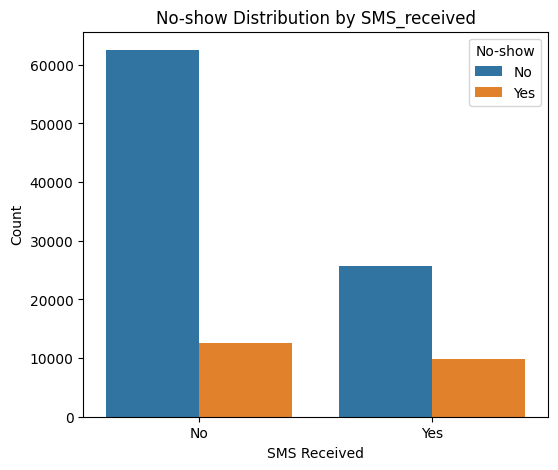

In [ ]:
# sms 전송 여부에 따른 병원 예약 취소 비율

plt.figure(figsize=(6,5))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('No-show Distribution by SMS_received')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

------------------------------------------------------------------------------

In [ ]:
# 'No-show' 열의 고유한 값들의 수를 계산
no_show_counts = df['No-show'].value_counts()

# 파이 차트를 그립니다.
plt.figure(figsize=(5,5))  # 차트의 크기를 설정합니다.
plt.pie(no_show_counts, labels = no_show_counts.index, autopct='%1.1f%%')  # 파이 차트를 그립니다.
plt.title('No-show distribution')  # 차트의 제목을 설정합니다.
plt.show()  #차트를 보여줍니다.

In [ ]:
#'PatientId'를 기준으로 데이터프레임 그룹화
grouped_df = df.groupby('PatientId')
appointment_counts = grouped_df['AppointmentID'].size() # 각 그룹별 'AppointmentID' 개수 확인
max_appointment_count = appointment_counts.max()   
print("가장 많은 AppointmentID 개수:", max_appointment_count)

가장 많은 AppointmentID 개수: 88


In [ ]:
# 가장 많은 'AppointmentID' 개수를 가진 사람의 'PatientId' 찾기
max_appointment_patient_id = appointment_counts.idxmax()
print("가장 많은 AppointmentID를 가진 PatientId:", max_appointment_patient_id)

가장 많은 AppointmentID를 가진 PatientId: 822145925426128.0


In [ ]:
max_appointment_patient = df[df['PatientId'] == 822145925426128.0]

In [ ]:
df[df['PatientId'] == 822145925426128.0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3006,8.221459e+14,5638995,M,2016-04-29T08:38:44Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
3060,8.221459e+14,5642878,M,2016-04-29T18:02:42Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
3093,8.221459e+14,5640809,M,2016-04-29T11:27:34Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
6984,8.221459e+14,5705135,M,2016-05-16T18:38:11Z,2016-05-16T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
6985,8.221459e+14,5668887,M,2016-05-06T09:54:32Z,2016-05-06T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109103,8.221459e+14,5790220,M,2016-06-08T17:18:03Z,2016-06-08T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
109114,8.221459e+14,5761322,M,2016-06-01T17:17:07Z,2016-06-01T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
109185,8.221459e+14,5696863,M,2016-05-13T14:28:49Z,2016-06-02T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,1,No
109211,8.221459e+14,5732192,M,2016-05-24T11:08:07Z,2016-06-03T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,1,No


In [ ]:
grouped_df = df.groupby('PatientId')['AppointmentDay'].count().reset_index()
#grouped_df = df.groupby('PatientId')['AppointmentDay']

In [ ]:
grouped_df

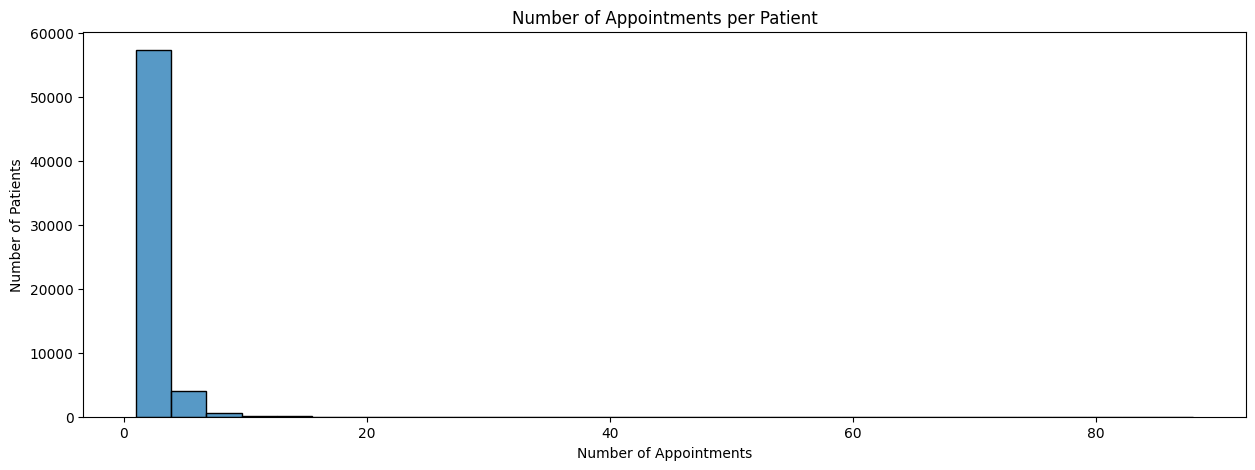

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(grouped_df['AppointmentDay'], kde=False, bins=30)
plt.title('Number of Appointments per Patient')
plt.xlabel('Number of Appointments')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
len(df['AppointmentID'].unique())

110527

In [ ]:
max_appointment_patient = df[df['PatientId'] == 822145925426128.0]
max_appointment_patient['AppointmentID']

PatientId
3.921784e+04    1
4.374176e+04    1
9.377953e+04    1
1.417242e+05    1
5.376153e+05    1
               ..
9.999320e+14    5
9.999350e+14    1
9.999465e+14    1
9.999686e+14    1
9.999816e+14    1
Name: AppointmentID, Length: 62299, dtype: int64

In [ ]:
# 'PatientId'를 기준으로 데이터프레임 그룹화
grouped_df = df.groupby('PatientId')

# 각 그룹별 'AppointmentID' 개수 확인
appointment_counts = grouped_df['AppointmentID'].size()

# 가장 많은 'AppointmentID' 개수를 가진 사람의 'PatientId' 찾기
max_appointment_patient_id = appointment_counts.idxmax()

# 결과 출력
print("가장 많은 AppointmentID를 가진 PatientId:", max_appointment_patient_id)

가장 많은 AppointmentID를 가진 PatientId: 822145925426128.0
